<a href="https://colab.research.google.com/github/SeongminKo/crosstalk/blob/main/1_FDE_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Differential Equations Solver ##
<br>

- https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/  <br>
**Introduces solution for 2-d heat equation for a homogenius medium**
<br>

- https://py-pde.readthedocs.io/en/latest/examples_gallery/boundary_conditions.html  <br>
**PDE solver for transient boundary conditions**
<br>

- http://www.eng.auburn.edu/~niuguof/6710webclass/html/pyintro/pyintro.html#install-epd-python-canopy-and-getting-myplot-py <br>
**Semiconductor simulations-especially focused on carrier concentration-in a pythonic way**
<br>

- https://www.pygimli.org/_tutorials_auto/2_modelling/plot_5-mod-fem-heat-2d.html  <br>
**Important : The only open source i found which solves PDEs with matlab-like mesh grid**
<br>

- https://wikidocs.net/14604  <br>
**Understanding Matplotlib**
<br>

<br>
<br>

**Let's begin with building a transient heat equation solver.**

In [1]:
# 2D heat equation solver #

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

length = 30
max_iter_time = 10
alpha = 1.0
dx = 0.2
dt = 1e-2
gamma = alpha*dt/(dx**2)

# For exploiting animation, declare a (1000,300,300) array(grid)
# For Faster calculation and reducing redundent memory, use DP which uses only two (300,300) arrays
TIME = int(max_iter_time/dt)
LEN = int(length/dx)
U = np.empty((int(max_iter_time/dt),int(length/dx), int(length/dx)))
# Initialize as '0'
U.fill(0.0)

# Boundary conditions
U[:,LEN-1:,int(LEN/3):int(2*LEN/3)] = 250      # Set the heat(current)source at the middle of the trisection
U[:, :, :1] = 0
U[:, :1, 1:] = 0
U[:, :, (LEN-1):] = 0

# Calculation #
# Every step in (From, To, step) is equal to 1.
def calculate(U):
    for k in range(0, TIME-1, 1):
        if (k%100) == 0:
            print(f"TIME = {k/1000: .3f}")
        for i in range(1, LEN-1, 1):
            for j in range(1, LEN-1, 1):  
                U[k + 1, i, j] = gamma * \
                (U[k][i+1][j] + U[k][i-1][j] + U[k][i][j+1] + U[k][i][j-1] - 4*U[k][i][j]) + U[k][i][j]
  
    return U

TIME =  0.000
TIME =  0.100
TIME =  0.200
TIME =  0.300
TIME =  0.400
TIME =  0.500
TIME =  0.600
TIME =  0.700
TIME =  0.800
TIME =  0.900


MovieWriter stderr:
[gif @ 0x56505c642600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

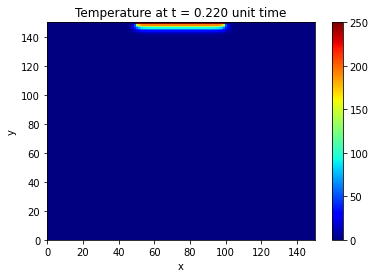

In [5]:
# Set the colormap
def plotheatmap(U_k, k):
    # Clear the current plot figure
    plt.clf()
    plt.title(f"Temperature at t = {k*dt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(U_k, cmap=plt.cm.jet, vmin=0, vmax=250)
    plt.colorbar()

    return plt

# RUN! #
U = calculate(U)

# Storing Animation
def animate(k):
    plotheatmap(U[2*k], 2*k)

# Since 'k' is now integer type, the interval must be 1.
# interval(ms)
# 1000 timesteps, hence max(2k) will be 998, frames = 499
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=499, repeat=False)
anim.save("heat_equation_solution.gif")

print("DONE!")